## Bad Data Visualization

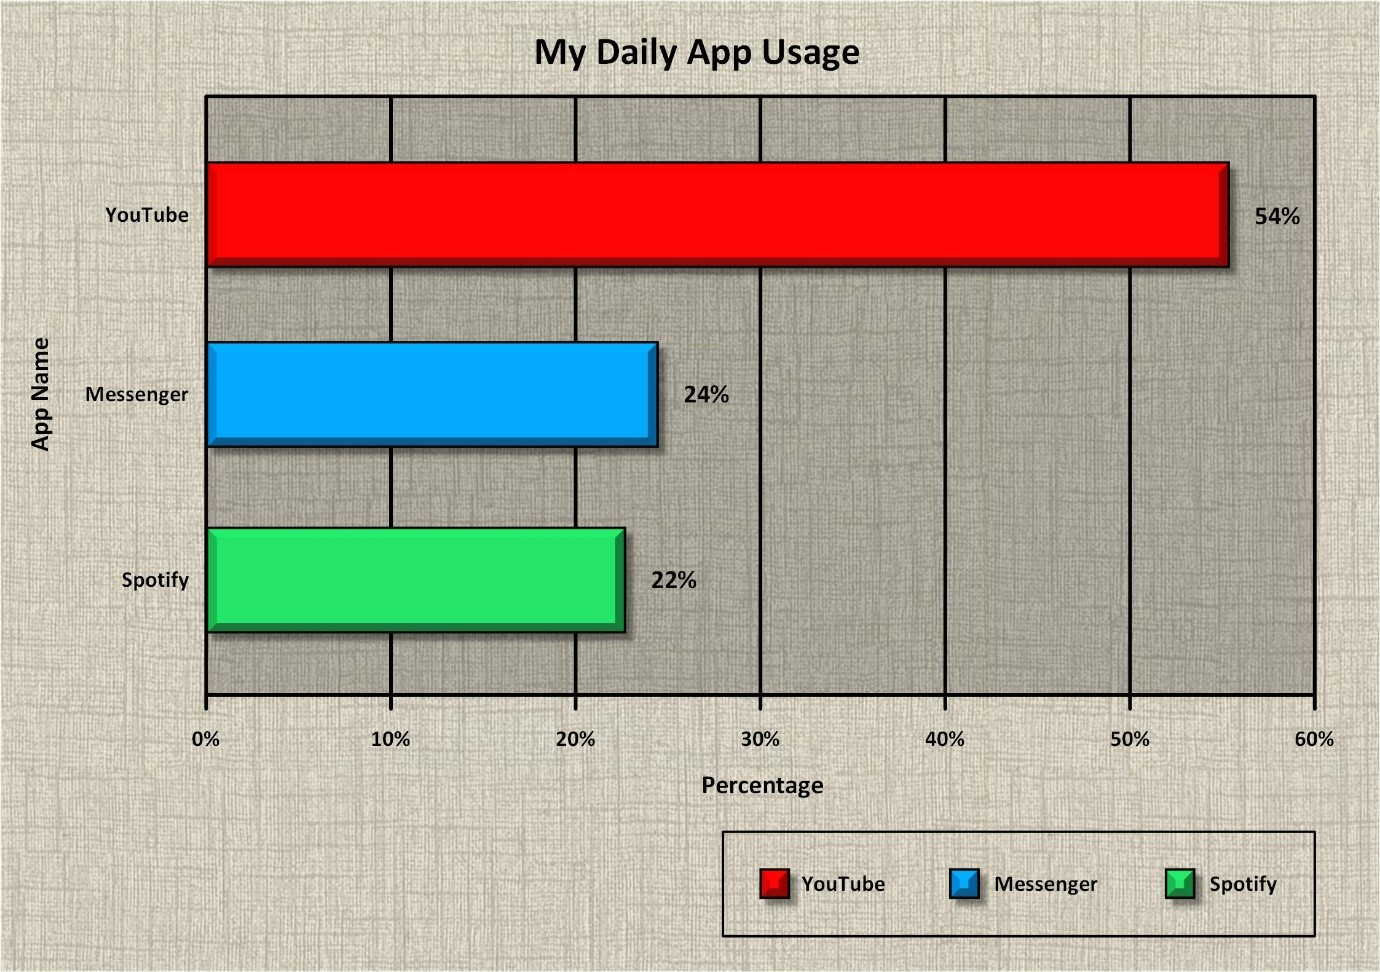

In [1]:
from IPython.display import Image
Image(filename='statistik_jelek.jpg')


## Good Data Visualization

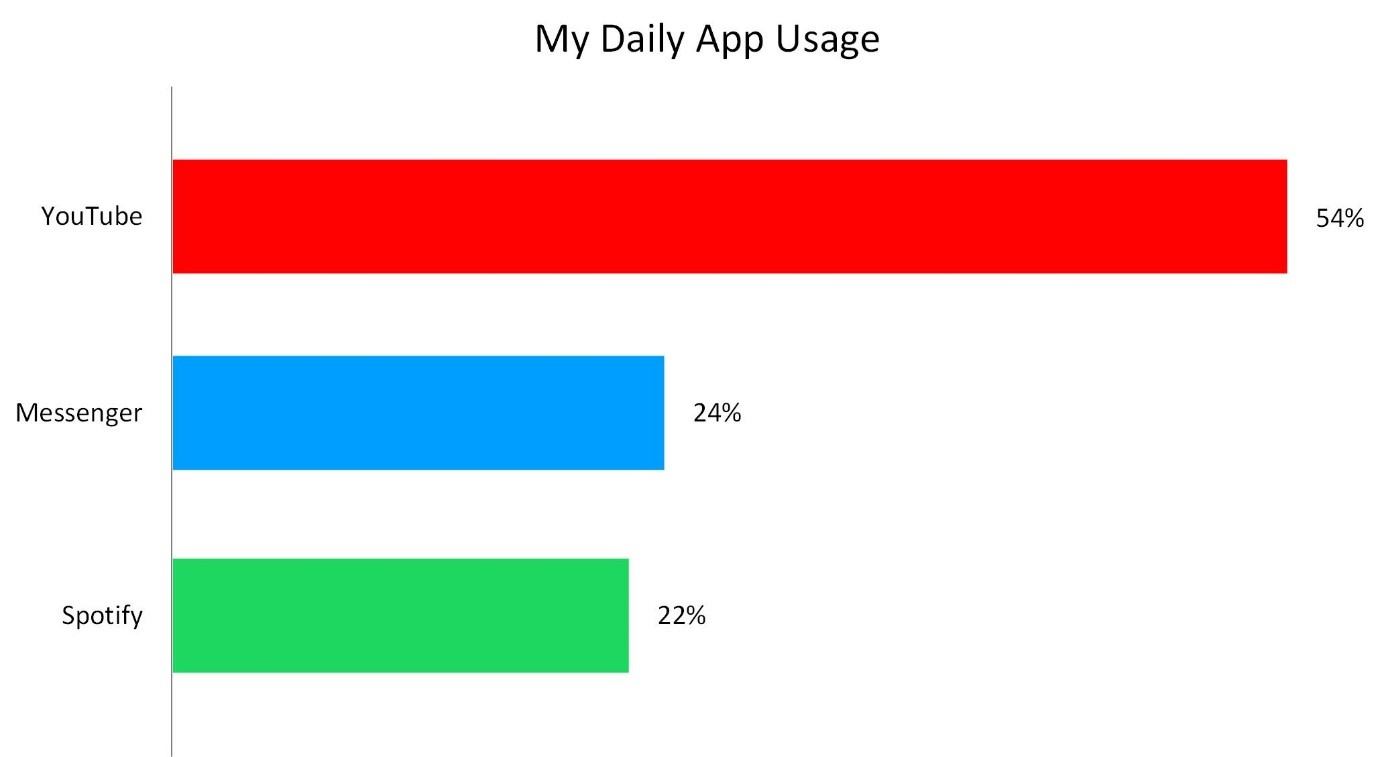

In [2]:
Image(filename='statistik_bagus.jpg')

## Creative Data Visualization

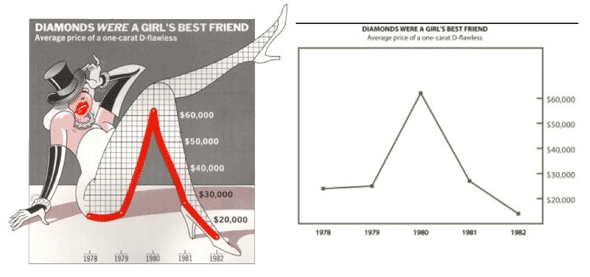

In [3]:
Image(filename='diamondweregirlbestfriend.jpeg')

## Data, Information, Knowledge, Insight, and Wisdom

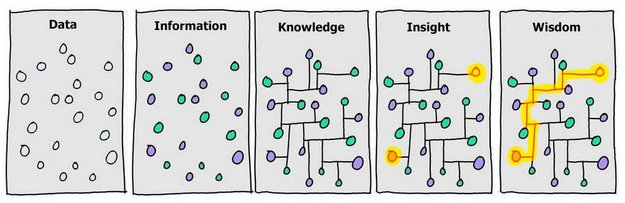

In [4]:
Image(filename='DIKW.jpg')

# Loading the data and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head?

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

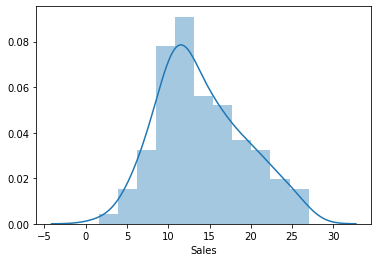

In [13]:
import seaborn as sns
sns.distplot(df.Sales)

plt.plot()

plt.show()

In [8]:
sns.distplot?

In [9]:
filt1 = df['Newspaper']>0
filt2 = df['Newspaper']<20

len(df[filt1 & filt2].loc[:,'Newspaper'])/len(df['Newspaper'])

0.375

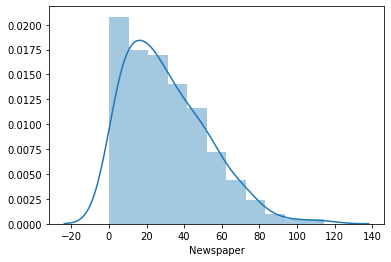

In [10]:
sns.distplot(df.Newspaper)

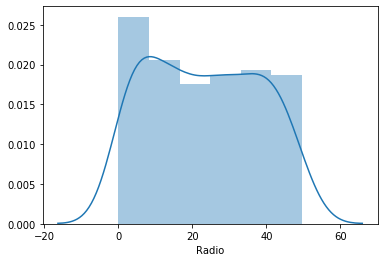

In [11]:
sns.distplot(df.Radio)

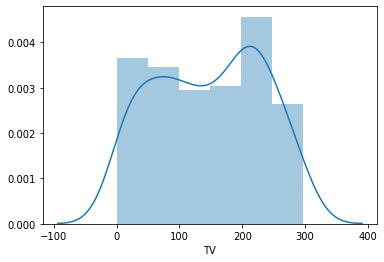

In [12]:
sns.distplot(df.TV)

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


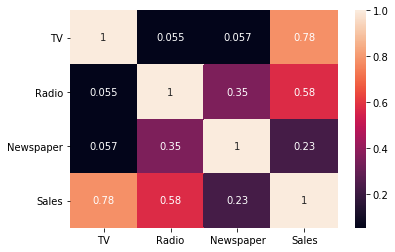

In [10]:
sns.heatmap(df.corr(),annot=True)

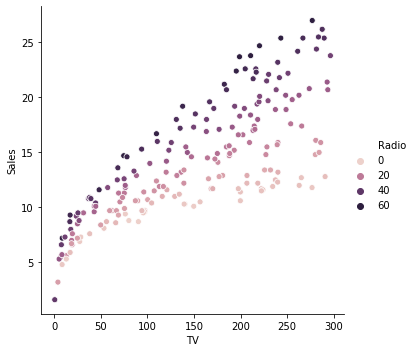

In [11]:
sns.relplot(x='TV',y='Sales',data=df,hue='Radio')

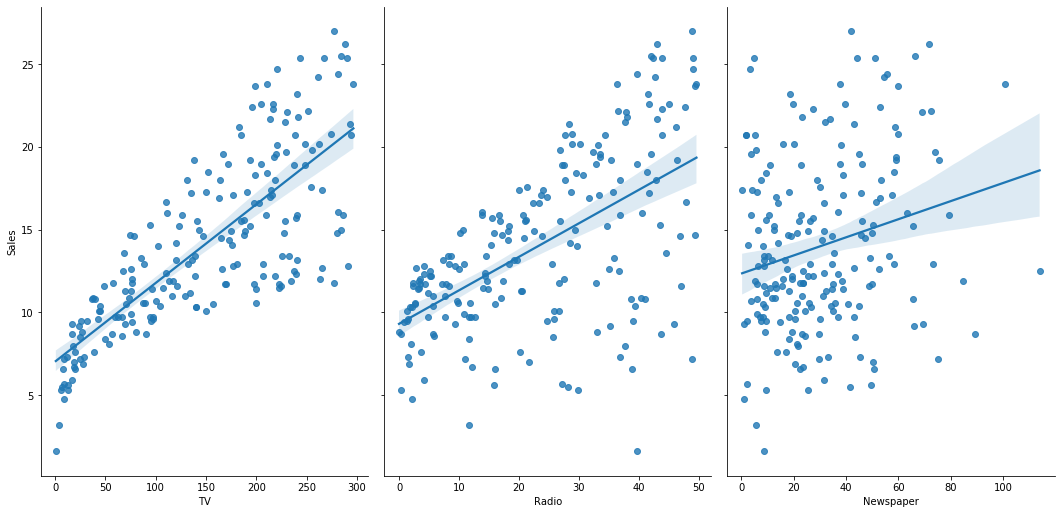

In [12]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,
            aspect=0.7,kind='reg')

# Linear Regression Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]#dependent variable,Feature
y = df[['Sales']]#variable target

In [13]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
y.mean()

Sales    14.0225
dtype: float64

In [17]:
#train split test

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=1)
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TypeError: 'tuple' object is not callable

# Interpresting Model Coefficient

In [19]:
print(linreg.intercept_)
print(linreg.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [20]:
y_pred = linreg.predict(X_test)

# Model Evaluation Metrics

In [21]:
from sklearn import metrics

In [22]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mae

1.0668917082595213

In [24]:
#Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test,y_pred)
mse

1.9730456202283384

In [25]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

1.4046514230328955

In [30]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5
